In [1]:
print(__doc__)

Automatically created module for IPython interactive environment


In [2]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import datasets, svm

In [3]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [4]:
svc = svm.SVC(kernel='linear')
C_s = np.logspace(-10, 0, 10)

In [5]:
scores = list()
scores_std = list()
for C in C_s:
    svc.C = C
    this_scores = cross_val_score(svc, X, y, n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

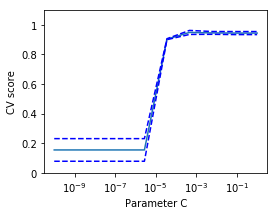

In [6]:
# Do the plotting
import matplotlib.pyplot as plt
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0, 1.1)
plt.show()